In this workshop we are goin to work with the dataset of the UPM researchers and their publications. This dataset is composed by two files: a json and a csv. These files are an extended versión of the csv that we used in the web application workshops.

Our goal is obtain as much information as we can from this dataset. We will achieve this in two ways: we will answer questions with numeric values (e.g. what is the average number publications of an UPM reaearcher? or, how many citations have the reseachers, suming all their publications?) or we will generate some charts to present information in a visual way (e.g. how is the relation between the publication year of a paper and its number of citations? or, how is the histogram of the number of publications by researcher?)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
publications = pd.read_json("data/publications.json")
researchers = pd.read_csv("data/researchers.csv")

# Dataset exploration
Any project related with data analysis starts with a study of the data itself: 
* What kind of data do we have?
* How is it organized? How many columns have each dataframe?
* Are there wrong or missing values?
* What does each value of a column means? How many different values are in each column?

With the examples we saw in the previous workshop try to answer that questions.

In [2]:
researchers.name.describe()
publications.dtypes

pages           object
authors         object
title           object
document_id     object
date            object
journal         object
openaccess        bool
cited_count    float64
type            object
dtype: object

# Data cleaning
After a first view of the data and before to start working with it, we must clean it. This proccess is called preprocessing and it is crucial to be able to obtain good results. We will discard invalid data, fill missing values, drop redundant information, etc. We need to create a dataset with the following restrictions.
* All reserachers should have name, last_name and auth_id. All publications should have title, journal and document_id. Drop the rows that do not match this condition (check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
* There are no duplicated publications (same title) or researchers (same name and lastname). To find duplicates check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
* All numeric fields must be an integer number bigger or equal to 0. Replace missing values with 0, round decimal values

In [3]:
import numpy as np

researchers = researchers.dropna(subset = ["auth_id", "name", "last_name", "orcid"])
publications = publications.dropna(subset = ["title", "journal", "document_id"])


researchers = researchers.drop_duplicates(subset=["name", "last_name"], keep="first")
publications.drop_duplicates(subset=["title"], keep="first")


researchers['citations'] = np.where(researchers['citations'] < 0, 0, researchers['citations'].apply(np.floor))
researchers['cited_by'] = np.where(researchers['cited_by'] < 0, 0, researchers['cited_by'].apply(np.floor))
researchers['publications'] = np.where(researchers['publications'] < 0, 0, researchers['publications'].apply(np.floor))

publications['cited_count'] = np.where(publications['cited_count'] < 0, 0, publications['cited_count'].apply(np.floor))
researchers
publications

,pages,authors,title,document_id,date,journal,openaccess,cited_count,type
0,664-678,"[57204955584, 57200520067, 24922369500, 244382...",High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0.0,Article
1,6356-6363,"[7005227142, 57200519327, 57200511770, 2443825...",Energy-Buffered Single-Phase Inverter Operatin...,85060314395,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,2.0,Conference Paper
2,1293-1300,"[57200511770, 57200519327, 56249124100, 244382...",ZVS transitions in Multi-Mode Single Stage Inv...,85060302761,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1.0,Conference Paper
3,7375-7379,"[57195619519, 57204116610, 24438258500, 700522...",Equivalent Parameters of Round and Litz Wire C...,85060302746,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,0.0,Conference Paper
4,4934-4939,"[57200519327, 57200511770, 24438258500, 562491...",Digital Variable Frequency Control of a Single...,85060299891,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1.0,Conference Paper
...,...,...,...,...,...,...,...,...,...
35959,None,"[57191585506, 57195954471, 57195321188, 571921...",Nuclear data sensitivity and uncertainty asses...,85030469540,2017-09-13,EPJ Web of Conferences,True,0.0,Conference Paper
35960,75-87,"[57195323836, 57195323776, 57195321188, 571900...",Predictive value of serum infliximab levels at...,85027118255,2017-06-01,Open Rheumatology Journal,True,3.0,Article
35961,144-153,"[57206889833, 57195310042]",The [textile] materiality of jorn utzon's encl...,85062100903,2018-11-01,Rita Revista Indexada de Textos Academicos,True,0.0,Article
35962,98-105,"[57195305282, 57195310042]",Ernesto N. Rogers and the preesistenza ambient...,85026897732,2015-04-01,Rita Revista Indexada de Textos Academicos,True,0.0,Article


Finally, to easy some calculations, lets convert the date column of the publications dataset to a datetime type

In [4]:
publications.date = pd.to_datetime(publications.date, errors='coerce')
publications = publications.dropna(subset = ["date"])

# Data analytics

Once we know about the data we are using and we have cleaned it, we need to ask what kind of useful information we can extract from that data. It is a good idea to make a kind of brainstorming of possible questions, then take the list of resulting questions and sort them by their difficulty, finally begin to answer them starting by the easiest ones.

Yoy may need to use a joined dataset to answer some questions

In [5]:
# This operation creates a dataset combining researchers and publications producing a dataset with one row for each
# combination of researcher-publication in which the researcher is one of the authors of the publication
data = researchers.merge(publications.rename(columns={"authors":"auth_id"}).explode("auth_id"), on="auth_id")

## Basic results

Some of the esaiest question or more basic results we can obtain are the following:
* Numeric results
    * How many researchers are?
    * How many publications are?
    * How many of journals are?
    * How many types of publications are?
    * How many publications of each type are?
    * How many publications have each researcher in average? (Use only researchers dataset)
    * Which is the oldest publication?
    * Which is the publication with most citations?
    * Who is the researcher with more publications? (Use only researchers dataset)
* Graphic results
    * Histogram of the number of publications per researcher
    * Bar chart of the number of publications by type
    * Line chart of the number of publications per year

Som of those questions are just countings, sumations or rankings, but other need data aggregations with ``groupby``.

**Answer each question in a different cell of this notebook (remember that you can insert new cell from the Insert menu).**

In [28]:
# How many researchers are there?
researchers["auth_id"].count()


614

In [32]:
# How many publications are there?
publications["title"].count()

35757

In [34]:
# How many journals are there?
publications["journal"].nunique()

7898

In [44]:
# How many types of publications are there?
publications.type.unique().tolist()

['Article',
 'Conference Paper',
 'Editorial',
 'Erratum',
 'Review',
 'Chapter',
 'Short Survey',
 'Book',
 'Article in Press',
 'Note',
 'Letter',
 None]

In [87]:
# How many publications of each type are there?
publications.groupby(["type"])["type"].count()

type
Article             21653
Article in Press       88
Book                   45
Chapter               683
Conference Paper    11690
Editorial             458
Erratum               110
Letter                 74
Note                  104
Review                799
Short Survey           32
Name: type, dtype: int64

In [50]:
# How many publications do the researchers have in average? (Use only researchers dataset)
researchers["publications"].mean()




31.39804241435563

In [80]:
# Which is the oldest publication?

publications.loc[publications.date == publications.date.min()]


,pages,authors,title,document_id,date,journal,openaccess,cited_count,type
33538,130-145,"[24580537700, 6504371460, 55463179200]",Study of the impedance of a platinum electrode...,26744475991,1959-01-01,Electrochimica Acta,False,28.0,Article


In [81]:
# Which is the publication with most citations?
publications.loc[publications.cited_count == publications.cited_count.max()]


,pages,authors,title,document_id,date,journal,openaccess,cited_count,type
2152,2507-2517,"[6507925214, 6701794860, 7004720416]",A review of feature selection techniques in bi...,35748932917,2007-10-01,Bioinformatics,True,2406.0,Review


In [82]:
# Who is the researcher with more publications? (Use only researchers dataset)
researchers.loc[researchers.publications == researchers.publications.max()]

,Unnamed: 0,auth_id,name,last_name,citations,cited_by,publications,orcid
4,4,8899577600,Javier,Bajo,2213.0,1376.0,271.0,0000-0003-0824-4133


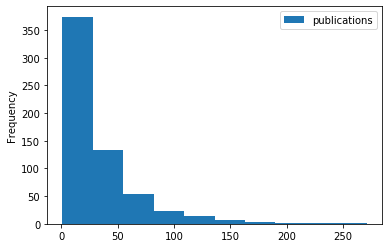

In [86]:
# Histogram of the number of publications per researcher ¿Esto no tiene sentido?
researchers["publications"].plot.hist()

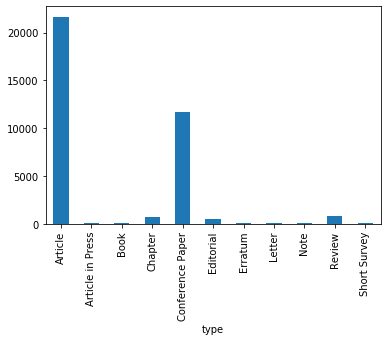

In [89]:
# Bar chart of the number of publications by type
publications.groupby(["type"])["type"].count().plot.bar(x = 'type', y = 'count')

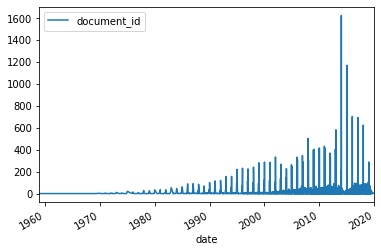

In [118]:
# Line chart of the number of publications per year
publications
publications.groupby(["date"]).count().plot.line(y = 3)

# Intermediate results

* Numeric results
    * How many publications of each researcher are in the data? Is this the same number than the column ``document-count``?
    * How many authors have each publication? (show 5)
    * What is the average number of authors in a publication?
    * What is the average number of pages in a publication depending of the publication type?
    * What is the average number of citations in a publication depending of the publication type?
    * How many years each researcher have been active? (difference between the publciationDate of the oldest and newest publications)
* Graphic results
    * Histogram of the number of researchers by the number of active years
    * Histogram of the number of authors in a publication
    * Scatter plot of the publication year vs the number of citations
    * Chart of the average number of citations depending on the publication type
    * Chart of the average number of pages depending on the publication type

**Choose 5 questions from the list and answer each in a different cell.**

In [18]:
# What is the average number of authors in a publication?
mean = 0;
for authorsList in publications.authors:
    if authorsList is not None:
        mean += len(authorsList)

print(mean/len(publications.authors))

5.262358371800252


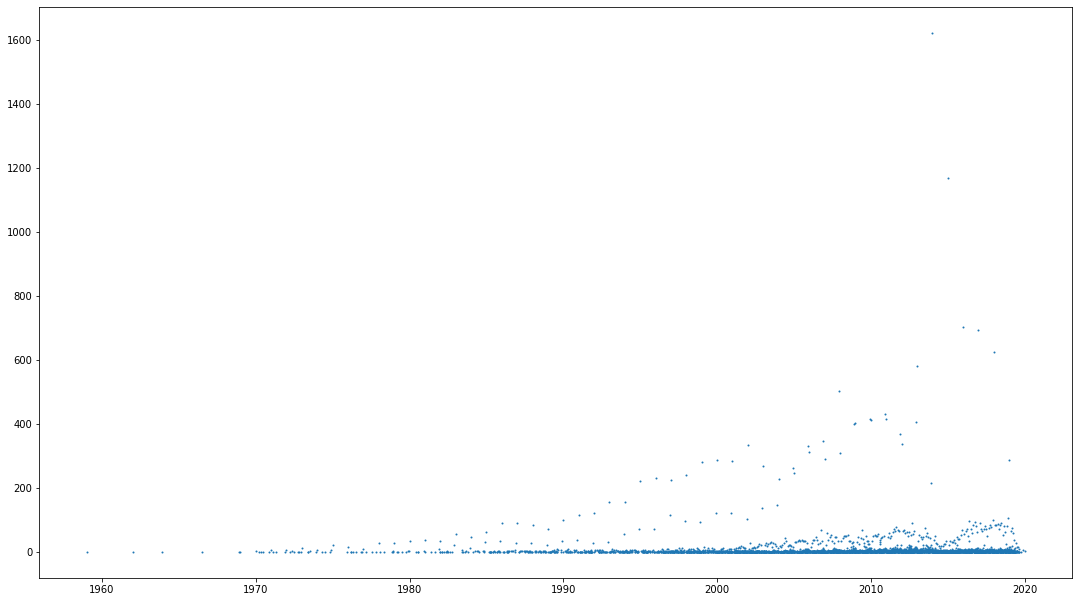

In [46]:
# Scatter plot of the publication year vs the number of citations
grouped = publications.groupby(["date"]).count().reset_index()
plt.scatter(grouped['date'], grouped['cited_count'], s=1)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


In [112]:
# How many years each researcher have been active? 
# (difference between the publciationDate of the oldest and newest publications)

newDf = pd.DataFrame(columns = ['id', 'time_active'])
for rs in researchers.auth_id.unique():
    rs_df = data[data['auth_id'] == rs]
    if not rs_df.empty:
        max_date = rs_df.loc[rs_df.date == rs_df.date.max()]['date'].dt.year.iloc[0]
        min_date = rs_df.loc[rs_df.date == rs_df.date.min()]['date'].dt.year.iloc[0]
        row = [rs, max_date - min_date]
        newDf.loc[len(newDf)] = row
newDf

,id,time_active
0,8899577600,14
1,7003699673,34
2,14010357000,19
3,7005864666,36
4,24722967900,31
...,...,...
602,55933105700,0
603,57205462726,0
604,34769551000,1
605,57170378400,0


In [70]:
# What is the average number of citations in a publication depending of the publication type?

type_grouped = publications.groupby(["type"]).mean().reset_index()
type_grouped

,type,openaccess,cited_count
0,Article,0.173001,17.434708
1,Article in Press,0.079545,0.636364
2,Book,0.044444,51.866667
3,Chapter,0.005857,2.951613
4,Conference Paper,0.044739,4.626914
5,Editorial,0.192140,1.423581
6,Erratum,0.518182,0.736364
7,Letter,0.202703,8.864865
8,Note,0.240385,5.096154
9,Review,0.222778,36.149123


In [ ]:
# Chart of the average number of citations depending on the publication type
type_grouped.plot.bar(x='type', y='cited_count')

## Advanced results

The most difficult questions to answer usually are a small set which needs more explanation than a single line.

* Coauthor: 
    One researcher is coatuhor with other if both appears as author in at least one publication. 
    * What is the average number of different coauthors of each researcher?
    * How is the most frequent coauthor (their id) of each researcher?


* H-index: 
    The h-index (https://en.wikipedia.org/wiki/H-index) is a metric that tries to describe the impact of a researcher based on the number of citations received in each publication. A researcher has a h-index of `n` if she has at least `n` publications with `n` or more citations.

    * What is the h-index of each researcher?
    * Chart of the publications and number of citations of a certain researcher, highlinting (in a different color) which publications contributed to the h-index

![alt text](img/h-index.svg "H-Index")

**Choose 1 group and solve it.**

In [80]:
# H-index
import bisect

hdf = pd.DataFrame(columns = ['id', 'h_index'])

for rs in researchers.auth_id.unique():
    
    is_rs = data['auth_id'] == rs
    cit_list = []
    
    for cit_count in data[is_rs].cited_count:
        bisect.insort(cit_list, cit_count)
        
    cit_list.reverse()
    
    for i in range(len(cit_list)):
        if (cit_list[i] <= i):
            row = [rs, i]
            hdf.loc[len(hdf)] = row
            break
            
hdf


,id,h_index
0,8899577600,28
1,7003699673,24
2,14010357000,28
3,7005864666,26
4,24722967900,25
...,...,...
574,57195339292,0
575,55933105700,0
576,57205462726,0
577,34769551000,1


<BarContainer object of 19 artists>

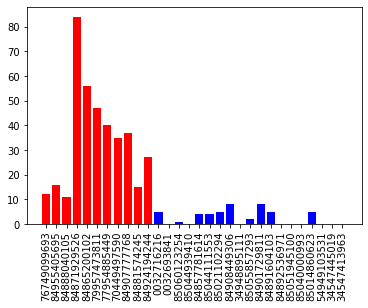

In [85]:
researcher =35782062100

res_df = data[data['auth_id'] == researcher]

cit_list = []
    
for cit_count in res_df.cited_count:
    bisect.insort(cit_list, cit_count)

cit_list.reverse()
h_index = 0

for i in range(len(cit_list)):
    if (cit_list[i] <= i):
        h_index = i
        break
        

mask1 = res_df.cited_count >= h_index
mask2 = res_df.cited_count < h_index

df1 = res_df[mask1]
df2 = res_df[mask2]

plt.xticks(rotation=90)
plt.bar(df1['document_id'], df1['cited_count'], color='r')
plt.bar(df2['document_id'], df2['cited_count'], color='b')